# Financial Time Series

pandas provides a number of different functions and DataFrame methods to import data stored in different formats (CSV, SQL, Excel, etc.) and to export data to different formats

In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
plt.style.use('seaborn-v0_8')
mpl.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'svg'

In [2]:
import warnings
warnings.simplefilter('ignore')

## Financial Data

### Data Import

This data is from tr_eikeon_eod_data.csv
I created a public dataset on Kaggle for easy access 
https://www.kaggle.com/datasets/sanginkang/eikeneodata

In [3]:
filename = '../../source/tr_eikon_eod_data.csv'  

In [4]:
f = open(filename, 'r')  
f.readlines()[:5]  

['Date,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD\n',
 '2010-01-01,,,,,,,,,1.4323,1096.35,,\n',
 '2010-01-04,30.57282657,30.95,20.88,133.9,173.08,113.33,1132.99,20.04,1.4411,1120.0,47.71,109.8\n',
 '2010-01-05,30.625683660000004,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.7\n',
 '2010-01-06,30.138541290000003,30.77,20.8,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.5,49.34,111.51\n']

In [5]:
data = pd.read_csv(filename,  
                   index_col=0, 
                   parse_dates=True)  

In [6]:
data.info()  

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29

Data columns (total 12 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   AAPL.O  2138 non-null   float64

 1   MSFT.O  2138 non-null   float64

 2   INTC.O  2138 non-null   float64

 3   AMZN.O  2138 non-null   float64

 4   GS.N    2138 non-null   float64

 5   SPY     2138 non-null   float64

 6   .SPX    2138 non-null   float64

 7   .VIX    2138 non-null   float64

 8   EUR=    2216 non-null   float64

 9   XAU=    2211 non-null   float64

 10  GDX     2138 non-null   float64

 11  GLD     2138 non-null   float64

dtypes: float64(12)

memory usage: 225.1 KB


In [7]:
#first 5 rows are shown
data.head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-01        NaN     NaN     NaN     NaN     NaN     NaN      NaN    NaN   
2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99  20.04   
2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52  19.35   
2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14  19.16   
2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69  19.06   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-01  1.4323  1096.35    NaN     NaN  
2010-01-04  1.4411  1120.00  47.71  109.80  
2010-01-05  1.4368  1118.65  48.17  109.70  
2010-01-06  1.4412  1138.50  49.34  111.51  
2010-01-07  1.4318  1131.90  49.10  110.82

In [8]:
#last 5 rows are shown
data.tail()  

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                          
2018-06-25  182.17   98.39   50.71  1663.15  221.54  271.00  2717.07  17.33   
2018-06-26  184.43   99.08   49.67  1691.09  221.58  271.60  2723.06  15.92   
2018-06-27  184.16   97.54   48.76  1660.51  220.18  269.35  2699.63  17.91   
2018-06-28  185.50   98.63   49.25  1701.45  223.42  270.89  2716.31  16.85   
2018-06-29  185.11   98.61   49.71  1699.80  220.57  271.28  2718.37  16.09   

              EUR=     XAU=    GDX     GLD  
Date                                        
2018-06-25  1.1702  1265.00  22.01  119.89  
2018-06-26  1.1645  1258.64  21.95  119.26  
2018-06-27  1.1552  1251.62  21.81  118.58  
2018-06-28  1.1567  1247.88  21.93  118.22  
2018-06-29  1.1683  1252.25  22.31  118.65

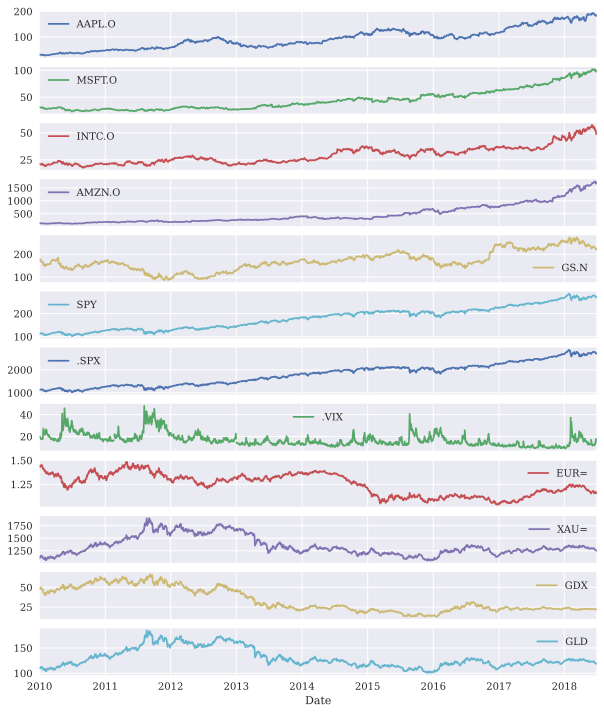

In [9]:
data.plot(figsize=(10, 12), subplots=True);  

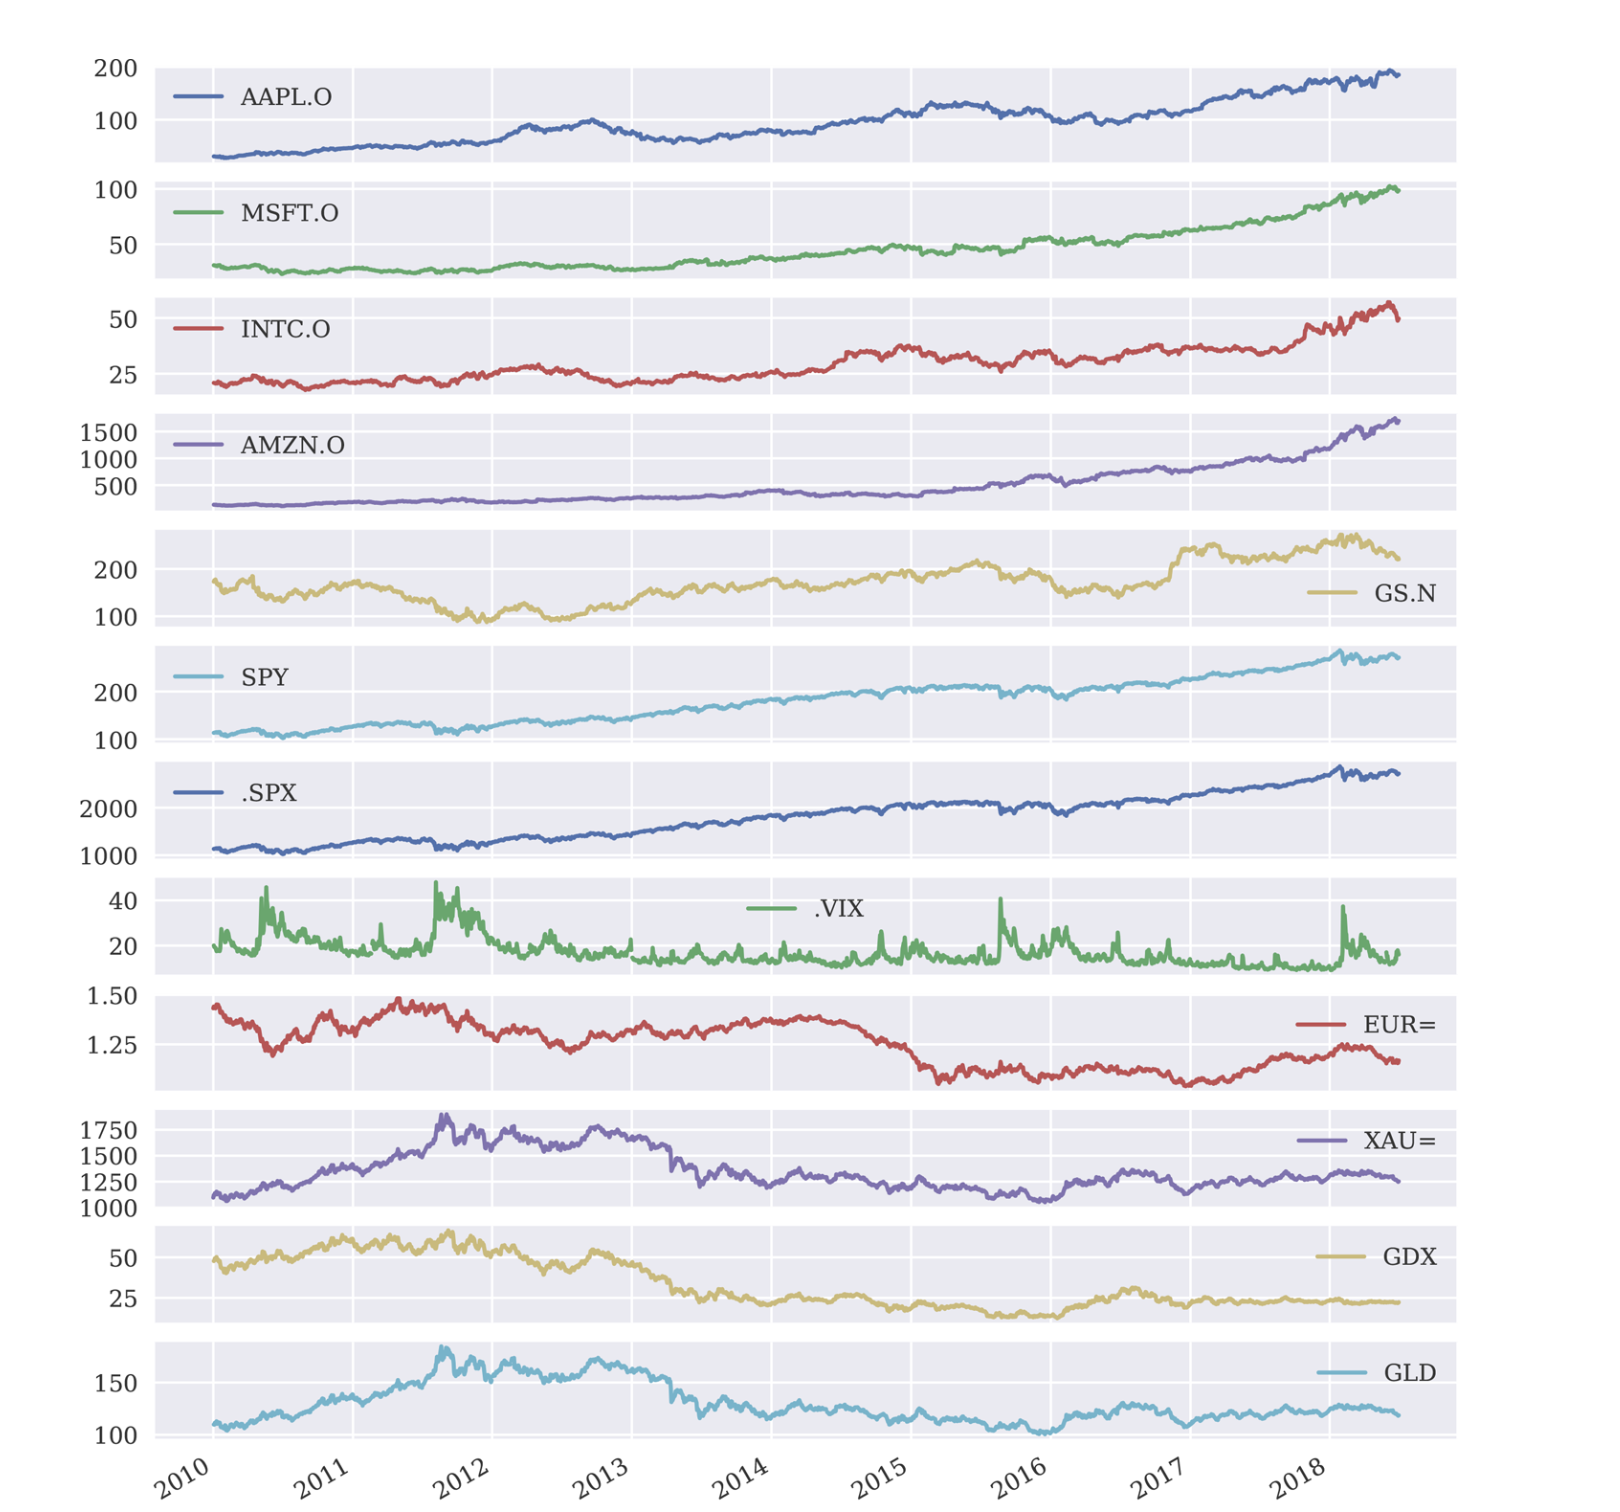

In [10]:
instruments = ['Apple Stock', 'Microsoft Stock',
               'Intel Stock', 'Amazon Stock', 'Goldman Sachs Stock',
               'SPDR S&P 500 ETF Trust', 'S&P 500 Index',
               'VIX Volatility Index', 'EUR/USD Exchange Rate',
               'Gold Price', 'VanEck Vectors Gold Miners ETF',
               'SPDR Gold Trust']

In [11]:
for ric, name in zip(data.columns, instruments):
    print('{:8s} | {}'.format(ric, name))

AAPL.O   | Apple Stock

MSFT.O   | Microsoft Stock

INTC.O   | Intel Stock

AMZN.O   | Amazon Stock

GS.N     | Goldman Sachs Stock

SPY      | SPDR S&P 500 ETF Trust

.SPX     | S&P 500 Index

.VIX     | VIX Volatility Index

EUR=     | EUR/USD Exchange Rate

XAU=     | Gold Price

GDX      | VanEck Vectors Gold Miners ETF

GLD      | SPDR Gold Trust


### Summary Statistics

In [12]:
data.info()  

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29

Data columns (total 12 columns):

 #   Column  Non-Null Count  Dtype  

---  ------  --------------  -----  

 0   AAPL.O  2138 non-null   float64

 1   MSFT.O  2138 non-null   float64

 2   INTC.O  2138 non-null   float64

 3   AMZN.O  2138 non-null   float64

 4   GS.N    2138 non-null   float64

 5   SPY     2138 non-null   float64

 6   .SPX    2138 non-null   float64

 7   .VIX    2138 non-null   float64

 8   EUR=    2216 non-null   float64

 9   XAU=    2211 non-null   float64

 10  GDX     2138 non-null   float64

 11  GLD     2138 non-null   float64

dtypes: float64(12)

memory usage: 225.1 KB


In [13]:
data.describe().round(2)  

AAPL.O   MSFT.O   INTC.O   AMZN.O     GS.N      SPY     .SPX     .VIX  \
count  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00  2138.00   
mean     93.46    44.56    29.36   480.46   170.22   180.32  1802.71    17.03   
std      40.55    19.53     8.17   372.31    42.48    48.19   483.34     5.88   
min      27.44    23.01    17.66   108.61    87.70   102.20  1022.58     9.14   
25%      60.29    28.57    22.51   213.60   146.61   133.99  1338.57    13.07   
50%      90.55    39.66    27.33   322.06   164.43   186.32  1863.08    15.58   
75%     117.24    54.37    34.71   698.85   192.13   210.99  2108.94    19.07   
max     193.98   102.49    57.08  1750.08   273.38   286.58  2872.87    48.00   

          EUR=     XAU=      GDX      GLD  
count  2216.00  2211.00  2138.00  2138.00  
mean      1.25  1349.01    33.57   130.09  
std       0.11   188.75    15.17    18.78  
min       1.04  1051.36    12.47   100.50  
25%       1.13  1221.53    22.14   117.40  
50%       1.27  1292.61    25.62   124.00  
75%       1.35  1428.24    48.34   139.00  
max       1.48  1898.99    66.63   184.59

In [14]:
data.mean()  

AAPL.O      93.455973
MSFT.O      44.561115
INTC.O      29.364192
AMZN.O     480.461251
GS.N       170.216221
SPY        180.323029
.SPX      1802.713106
.VIX        17.027133
EUR=         1.248587
XAU=      1349.014130
GDX         33.566525
GLD        130.086590
dtype: float64

1.The mean value per column.

2.The minimum value per column.

3.The mean value per column.

4.The standard deviation per column.

5.The median per column.

6.The maximum value per column.

In [15]:
data.aggregate([min,  
                np.mean,  
                np.std,  
                np.median,  
                max]  
).round(2)

AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX   .VIX  EUR=  \
min      27.44   23.01   17.66   108.61   87.70  102.20  1022.58   9.14  1.04   
mean     93.46   44.56   29.36   480.46  170.22  180.32  1802.71  17.03  1.25   
std      40.55   19.53    8.17   372.31   42.48   48.19   483.34   5.88  0.11   
median   90.55   39.66   27.33   322.06  164.43  186.32  1863.08  15.58  1.27   
max     193.98  102.49   57.08  1750.08  273.38  286.58  2872.87  48.00  1.48   

           XAU=    GDX     GLD  
min     1051.36  12.47  100.50  
mean    1349.01  33.57  130.09  
std      188.75  15.17   18.78  
median  1292.61  25.62  124.00  
max     1898.99  66.63  184.59

### Changes Over Time

First, the absolute differences, for which pandas provides a special method:



In [16]:
data.diff().head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O  GS.N   SPY  .SPX  .VIX    EUR=  \
Date                                                                           
2010-01-01       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN     NaN   
2010-01-04       NaN     NaN     NaN     NaN   NaN   NaN   NaN   NaN  0.0088   
2010-01-05  0.052857   0.010   -0.01    0.79  3.06  0.30  3.53 -0.69 -0.0043   
2010-01-06 -0.487142  -0.190   -0.07   -2.44 -1.88  0.08  0.62 -0.19  0.0044   
2010-01-07 -0.055714  -0.318   -0.20   -2.25  3.41  0.48  4.55 -0.10 -0.0094   

             XAU=   GDX   GLD  
Date                           
2010-01-01    NaN   NaN   NaN  
2010-01-04  23.65   NaN   NaN  
2010-01-05  -1.35  0.46 -0.10  
2010-01-06  19.85  1.17  1.81  
2010-01-07  -6.60 -0.24 -0.69

In [17]:
data.diff().mean()  

AAPL.O    0.064737
MSFT.O    0.031246
INTC.O    0.013540
AMZN.O    0.706608
GS.N      0.028224
SPY       0.072103
.SPX      0.732659
.VIX     -0.019583
EUR=     -0.000119
XAU=      0.041887
GDX      -0.015071
GLD      -0.003455
dtype: float64

The following code derives the percentage changes or percentage returns 
pct_change() calculates the percentage change between two index values.

In [18]:
data.pct_change().round(3).head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.034 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.020  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.022    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

From a statistics point of view, absolute changes are not optimal because they are dependent on the scale of the time series data itself. Therefore, percentage changes are usually preferred. The following code derives the percentage changes or percentage returns 

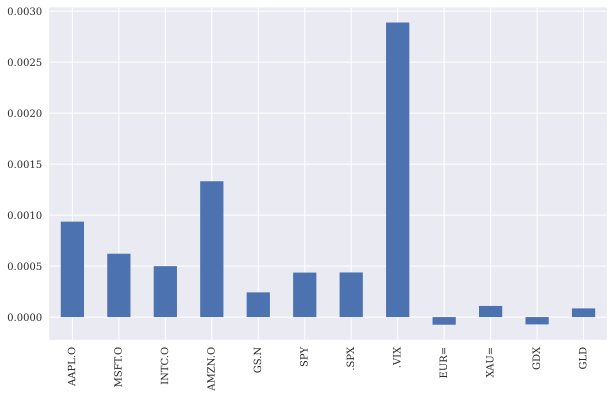

In [19]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_02.png');

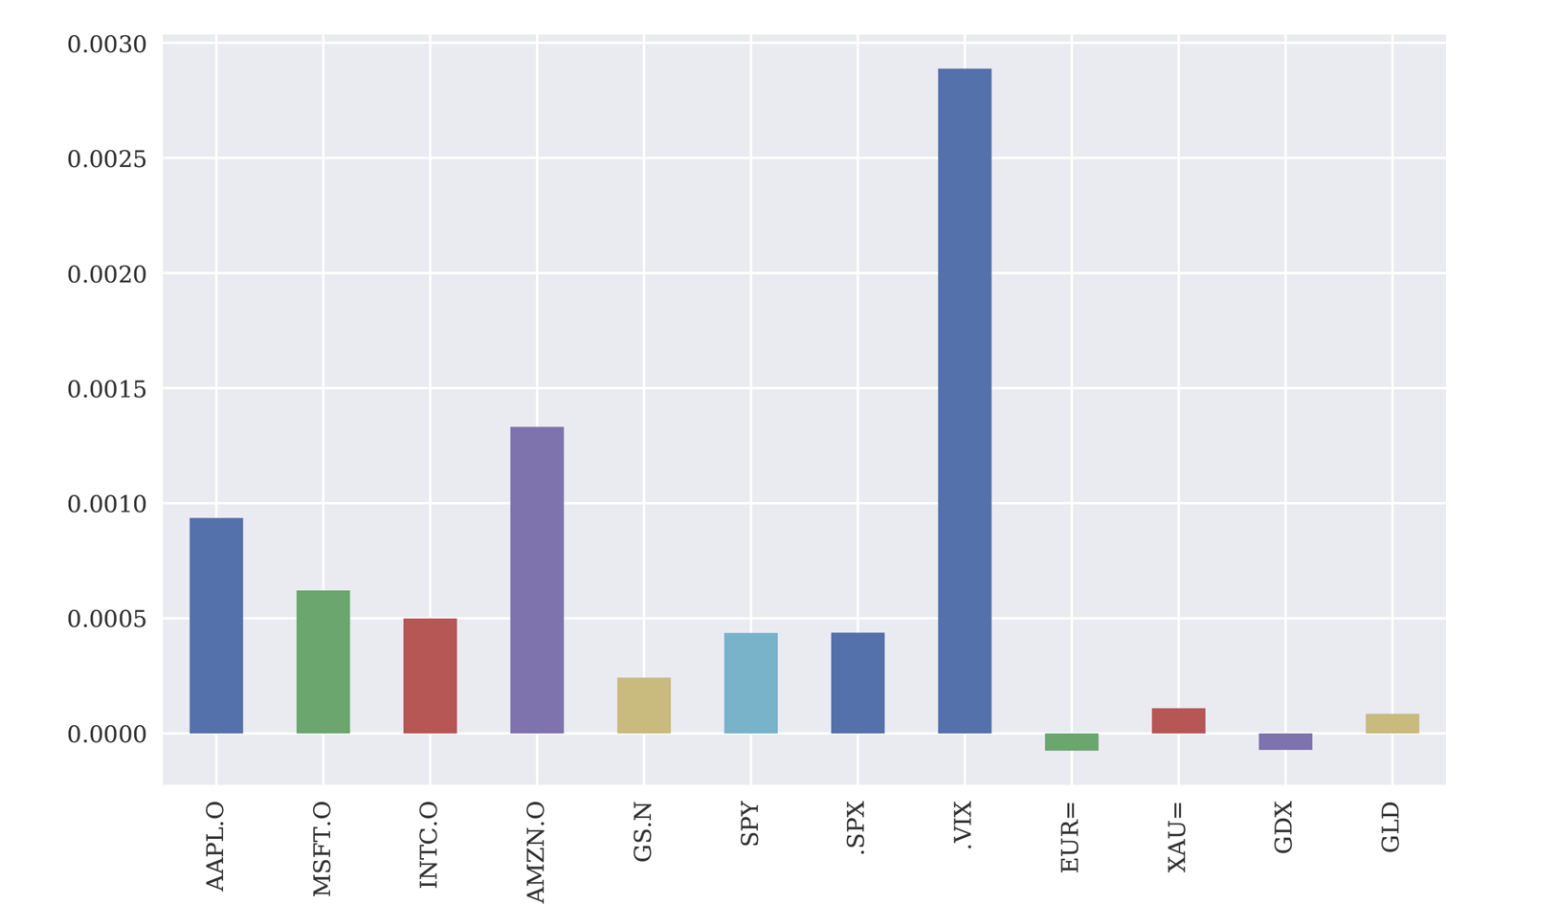

As an alternative to percentage returns, log returns can be used. In some scenarios, they are easier to handle and therefore often preferred in a financial context

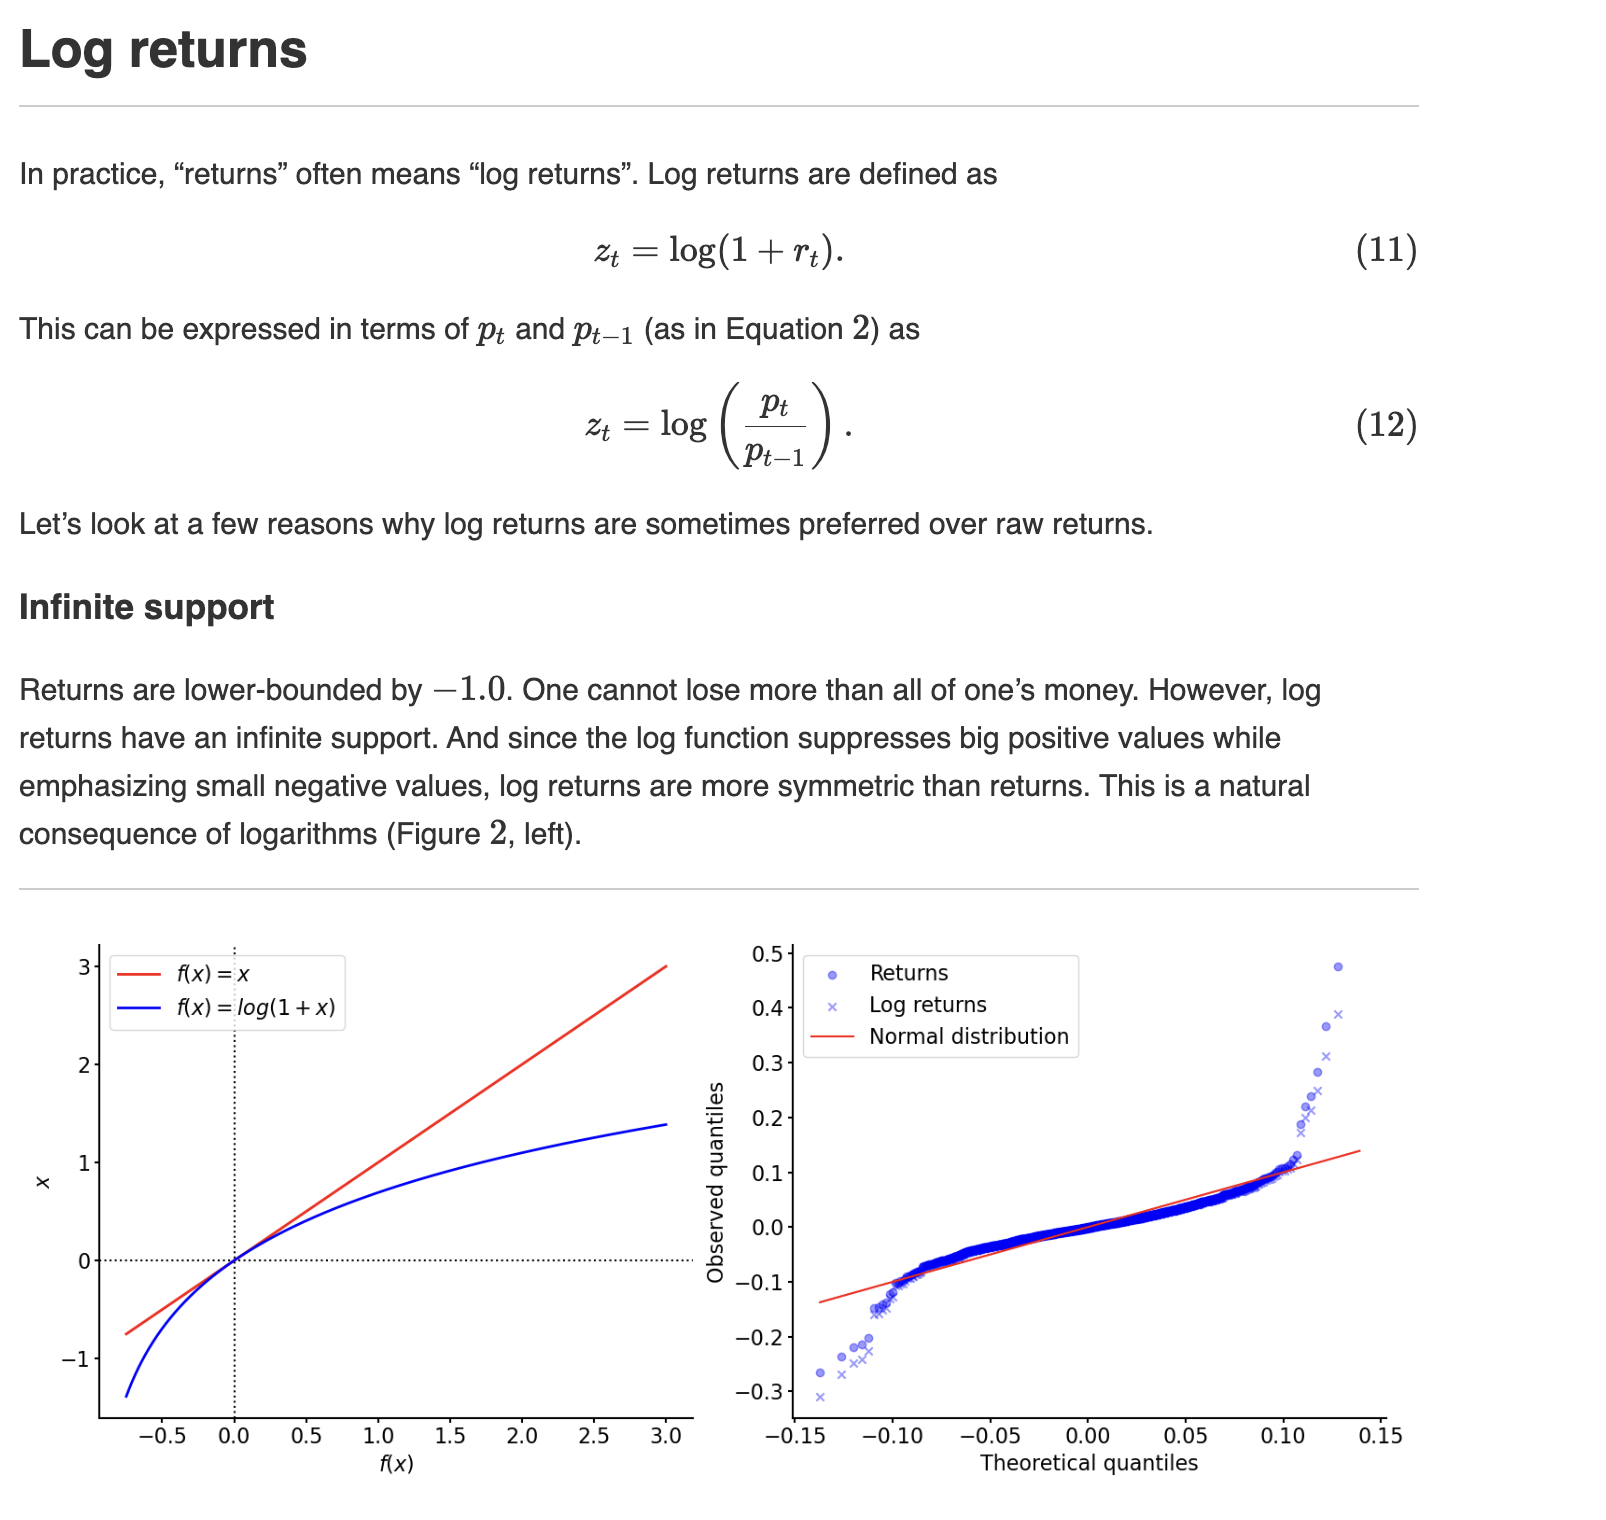

In [20]:
rets = np.log(data / data.shift(1))  

In [21]:
rets.head().round(3)  

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.035 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.019  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.021    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

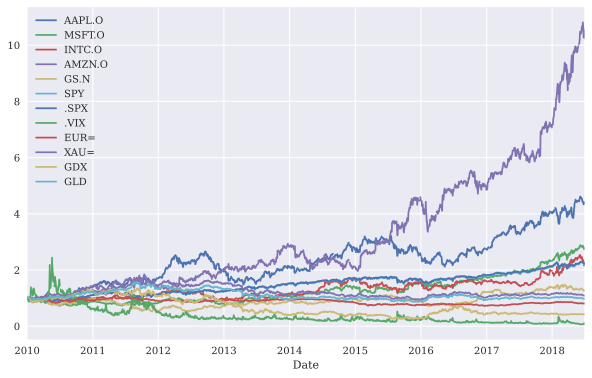

In [22]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6));  


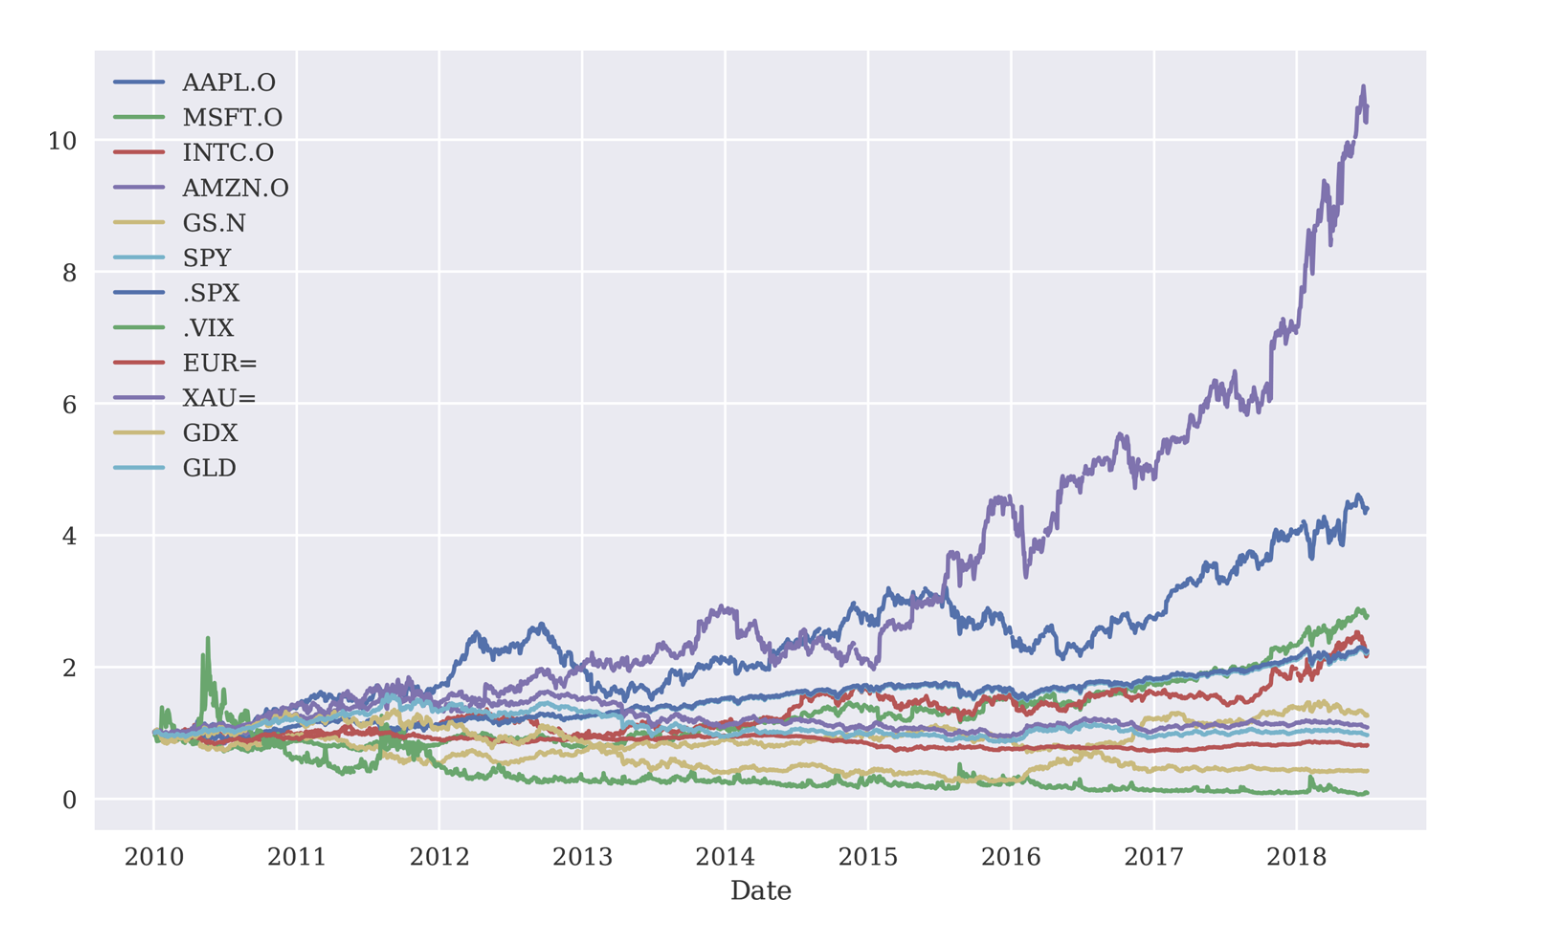

### Resampling


EOD data gets resampled to weekly time interva and monthly time intervals.

This plots the cumulative log returns over time: first, the cumsum() method is called, then np.exp() is applied to the results; finally, the resampling takes place.

In [23]:
data.resample('1w', label='right').last().head()  

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-03        NaN     NaN     NaN     NaN     NaN     NaN      NaN    NaN   
2010-01-10  30.282827   30.66   20.83  133.52  174.31  114.57  1144.98  18.13   
2010-01-17  29.418542   30.86   20.80  127.14  165.21  113.64  1136.03  17.91   
2010-01-24  28.249972   28.96   19.91  121.43  154.12  109.21  1091.76  27.31   
2010-01-31  27.437544   28.18   19.40  125.41  148.72  107.39  1073.87  24.62   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-03  1.4323  1096.35    NaN     NaN  
2010-01-10  1.4412  1136.10  49.84  111.37  
2010-01-17  1.4382  1129.90  47.42  110.86  
2010-01-24  1.4137  1092.60  43.79  107.17  
2010-01-31  1.3862  1081.05  40.72  105.96

In [24]:
data.resample('1m', label='right').last().head()  

AAPL.O   MSFT.O  INTC.O  AMZN.O    GS.N       SPY     .SPX  \
Date                                                                        
2010-01-31  27.437544  28.1800   19.40  125.41  148.72  107.3900  1073.87   
2010-02-28  29.231399  28.6700   20.53  118.40  156.35  110.7400  1104.49   
2010-03-31  33.571395  29.2875   22.29  135.77  170.63  117.0000  1169.43   
2010-04-30  37.298534  30.5350   22.84  137.10  145.20  118.8125  1186.69   
2010-05-31  36.697106  25.8000   21.42  125.46  144.26  109.3690  1089.41   

             .VIX    EUR=     XAU=    GDX      GLD  
Date                                                
2010-01-31  24.62  1.3862  1081.05  40.72  105.960  
2010-02-28  19.50  1.3625  1116.10  43.89  109.430  
2010-03-31  17.59  1.3510  1112.80  44.41  108.950  
2010-04-30  22.05  1.3295  1178.25  50.51  115.360  
2010-05-31  32.07  1.2305  1215.71  49.86  118.881

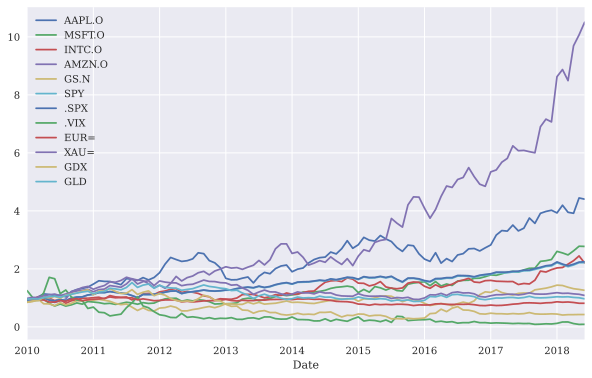

In [25]:
rets.cumsum().apply(np.exp). resample('1m', label='right').last(
                          ).plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_04.png');

## Rolling Statistics

It is financial tradition to work with rolling statistics, often also called financial indicators or financial studies. Such rolling statistics are basic tools for financial chartists and technical traders, for example. This section works with a single financial time series only.

Rolling statistics are a major tool in the so-called technical analysis of stocks, as compared to the fundamental analysis which focuses, for instance, on financial reports and the strategic positions of the company whose stock is being analyzed.

A decades-old trading strategy based on technical analysis is using two simple moving averages (SMAs). The idea is that the trader should go long on a stock (or financial instrument in general) when the shorter-term SMA is above the longer-term SMA and should go short when the opposite holds true. The concepts can be made precise with pandas and the capabilities of the DataFrame object.

Rolling statistics are generally only calculated when there is enough data given the window parameter specification. As Figure 8-6 shows, the SMA time series only start at the day for which there is enough data given the specific parameterization:

In [26]:
sym = 'AAPL.O'

In [27]:
data = pd.DataFrame(data[sym]).dropna()

In [28]:
data.tail()

AAPL.O
Date              
2018-06-25  182.17
2018-06-26  184.43
2018-06-27  184.16
2018-06-28  185.50
2018-06-29  185.11

Rolling Statistics Continued



1.Defines the window; i.e., the number of index values to include.


2.Calculates the rolling minimum value.


3.Calculates the rolling mean value.


4.Calculates the rolling standard deviation.


5.Calculates the rolling median value.


6.Calculates the rolling maximum value.


7.Calculates the exponentially weighted moving average, with decay in terms of a half life of 0.5.

In [29]:
window = 20  

In [30]:
data['min'] = data[sym].rolling(window=window).min()  

In [31]:
data['mean'] = data[sym].rolling(window=window).mean()  

In [32]:
data['std'] = data[sym].rolling(window=window).std()  

In [33]:
data['median'] = data[sym].rolling(window=window).median()  

In [34]:
data['max'] = data[sym].rolling(window=window).max()  

In [35]:
data['ewma'] = data[sym].ewm(halflife=0.5, min_periods=window).mean()  

In [36]:
data.dropna().head()

AAPL.O        min       mean       std     median        max  \
Date                                                                          
2010-02-01  27.818544  27.437544  29.580892  0.933650  29.821542  30.719969   
2010-02-02  27.979972  27.437544  29.451249  0.968048  29.711113  30.719969   
2010-02-03  28.461400  27.437544  29.343035  0.950665  29.685970  30.719969   
2010-02-04  27.435687  27.435687  29.207892  1.021129  29.547113  30.719969   
2010-02-05  27.922829  27.435687  29.099892  1.037811  29.419256  30.719969   

                 ewma  
Date                   
2010-02-01  27.805432  
2010-02-02  27.936337  
2010-02-03  28.330134  
2010-02-04  27.659299  
2010-02-05  27.856947

The following code shows a subset of the results and visualizes a selection of the calculated rolling statistics

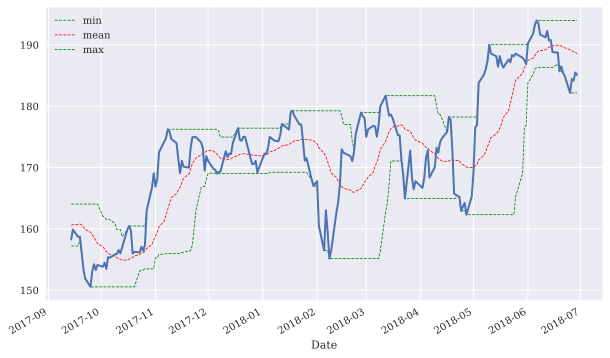

In [37]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10, 6), style=['g--', 'r--', 'g--'], lw=0.8)  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0);  
# plt.savefig('../../images/ch08/fts_05.png');

### A Technical Analysis Example

1.Calculates the values for the shorter-term SMA.

2.Calculates the values for the longer-term SMA.

3.Visualizes the stock price data plus the two SMA time series.

In [38]:
data['SMA1'] = data[sym].rolling(window=42).mean()  

In [39]:
data['SMA2'] = data[sym].rolling(window=252).mean()  

In [40]:
data[[sym, 'SMA1', 'SMA2']].tail()

AAPL.O        SMA1        SMA2
Date                                      
2018-06-25  182.17  185.606190  168.265556
2018-06-26  184.43  186.087381  168.418770
2018-06-27  184.16  186.607381  168.579206
2018-06-28  185.50  187.089286  168.736627
2018-06-29  185.11  187.470476  168.901032

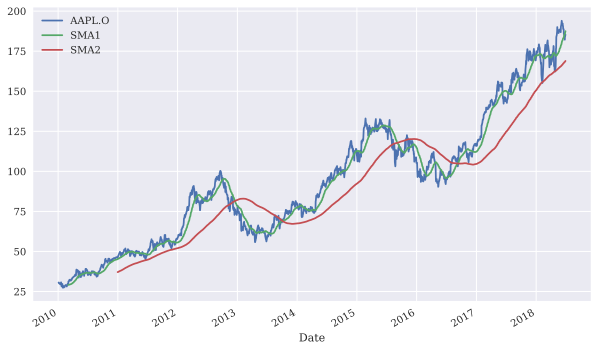

In [41]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6));  
# plt.savefig('../../images/ch08/fts_06.png');

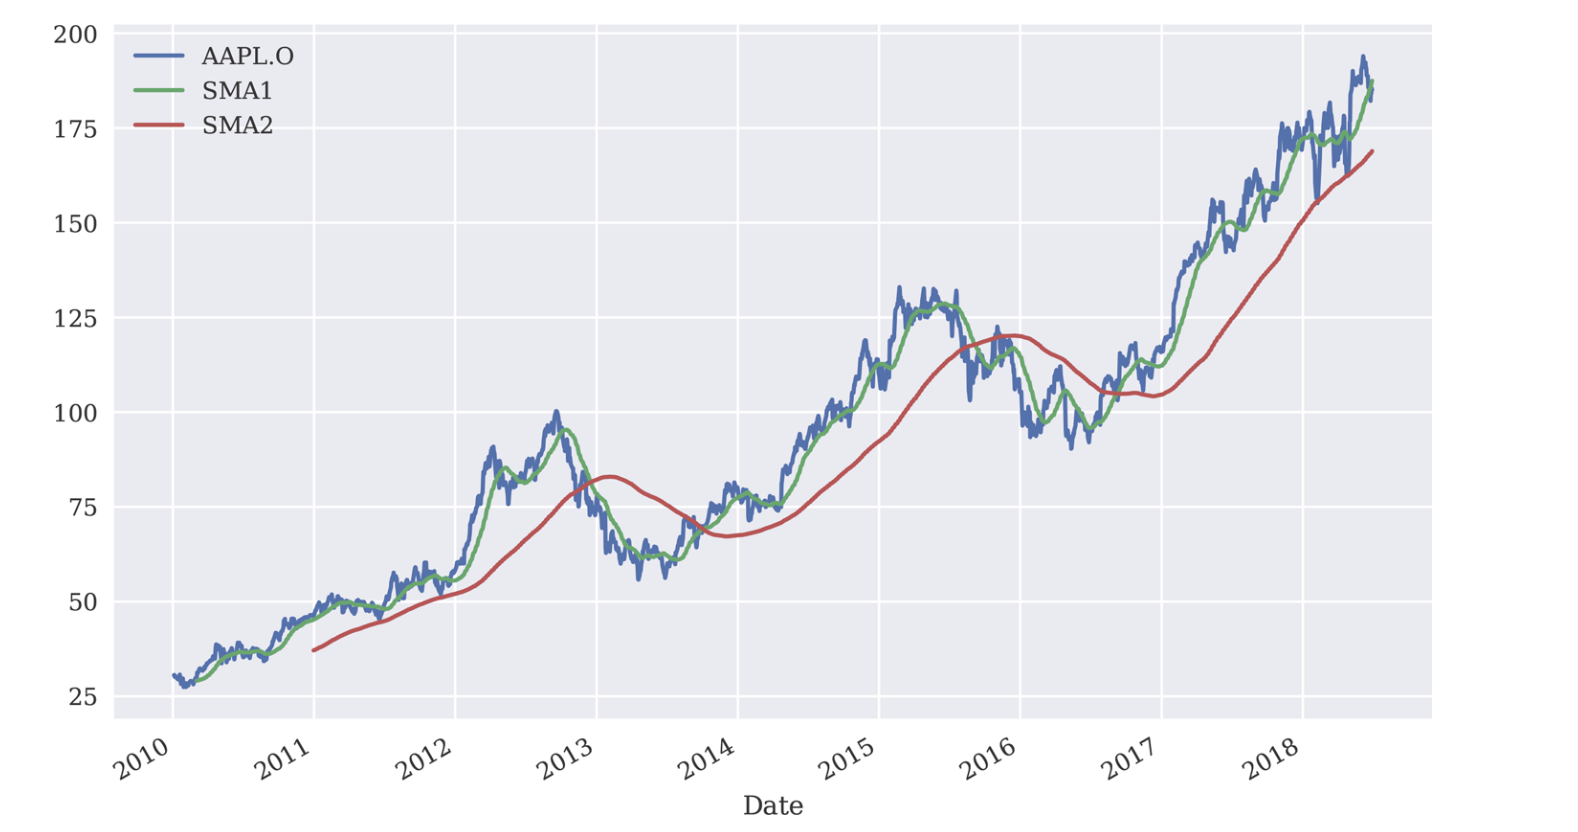

In [42]:
data.dropna(inplace=True)  

In [43]:
data['positions'] = np.where(data['SMA1'] > data['SMA2'],  
                             1,  
                             -1)  

1.Only complete data rows are kept.


2.If the shorter-term SMA value is greater than the longer-term one …


  Else :go long on the stock (put a 1).

3.Otherwise, go short on the stock (put a -1).



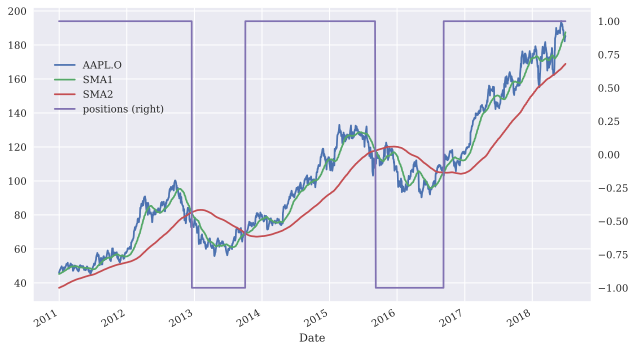

In [44]:
ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),
                                              secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));
# plt.savefig('../../images/ch08/fts_07.png');

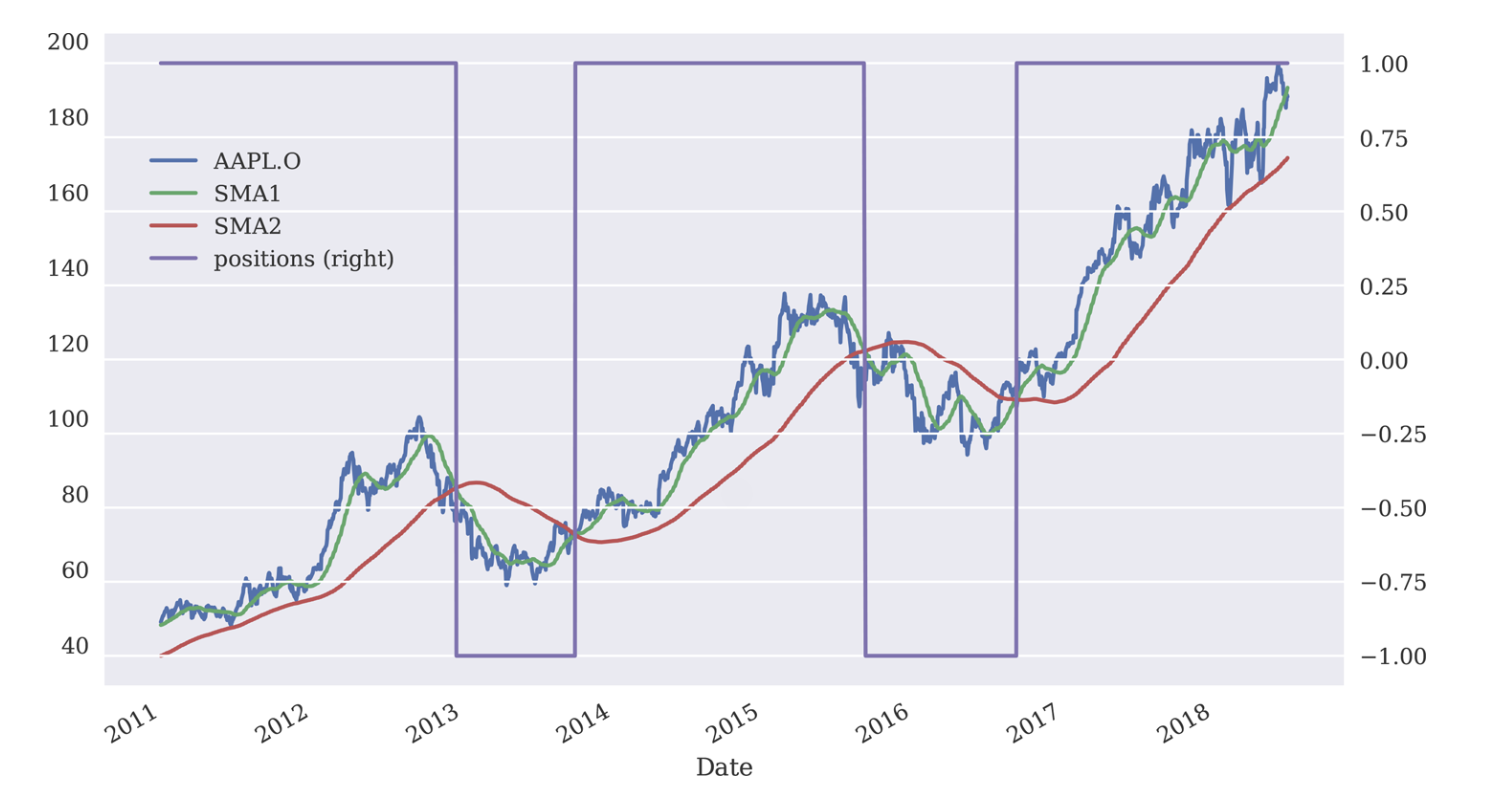

The trading strategy implicitly derived here only leads to a few trades per se: only when the position value changes (i.e., a crossover happens) does a trade take place. Including opening and closing trades, this would add up to just six trades in total.

## Regression Analysis

As a further illustration of how to work with pandas and financial time series data, consider the case of the S&P 500 stock index and the VIX volatility index. It is a stylized fact that when the S&P 500 rises, the VIX falls in general, and vice versa. This is about correlation and not causation. This section shows how to come up with some supporting statistical evidence for the stylized fact that the S&P 500 and the VIX are (highly) negatively correlated

### The Data

In [45]:
# EOD data from Thomson Reuters Eikon Data API
raw = pd.read_csv('../../source/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [46]:
data = raw[['.SPX', '.VIX']].dropna()

In [47]:
data.tail()

.SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09

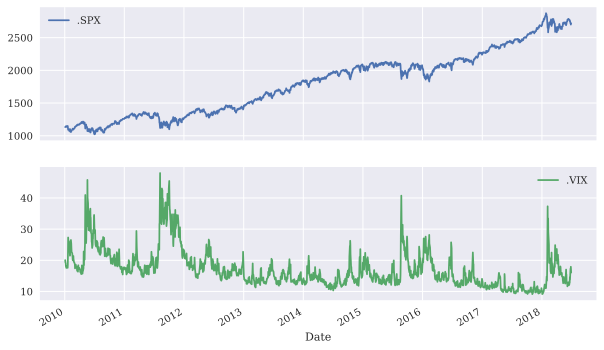

In [48]:
data.plot(subplots=True, figsize=(10, 6));


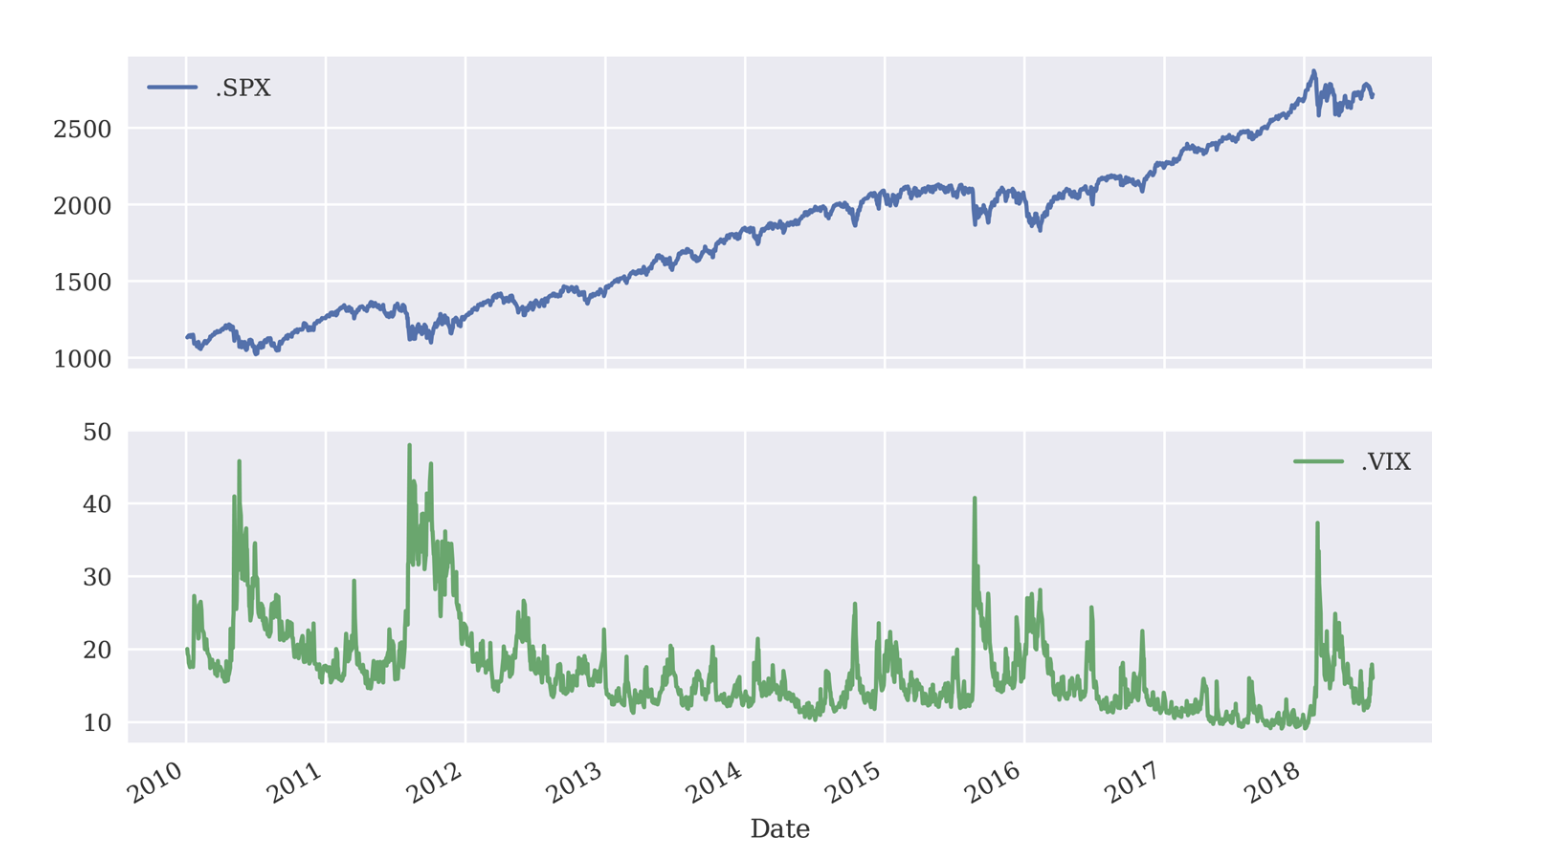

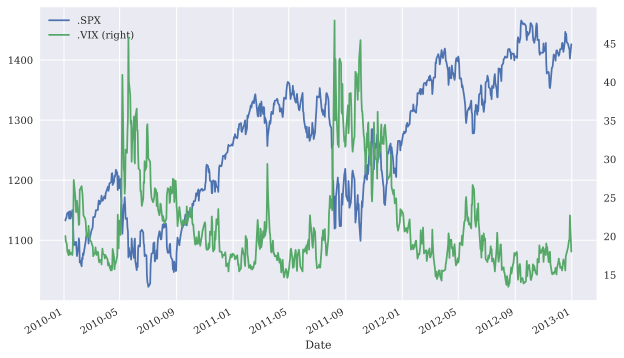

In [49]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6));  


### Log Returns

In [50]:
rets = np.log(data / data.shift(1)) 

In [51]:
rets.head()

.SPX      .VIX
Date                          
2010-01-04       NaN       NaN
2010-01-05  0.003111 -0.035038
2010-01-06  0.000545 -0.009868
2010-01-07  0.003993 -0.005233
2010-01-08  0.002878 -0.050024

In [52]:
rets.dropna(inplace=True)

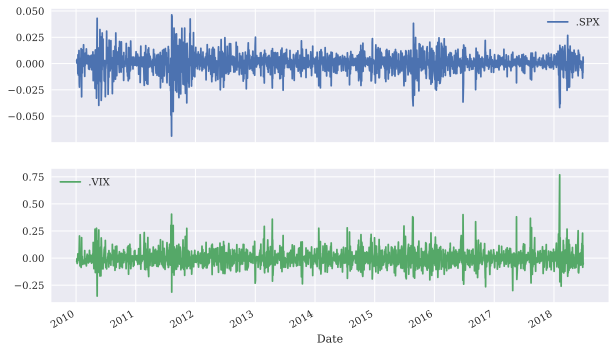

In [53]:
rets.plot(subplots=True, figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_10.png');

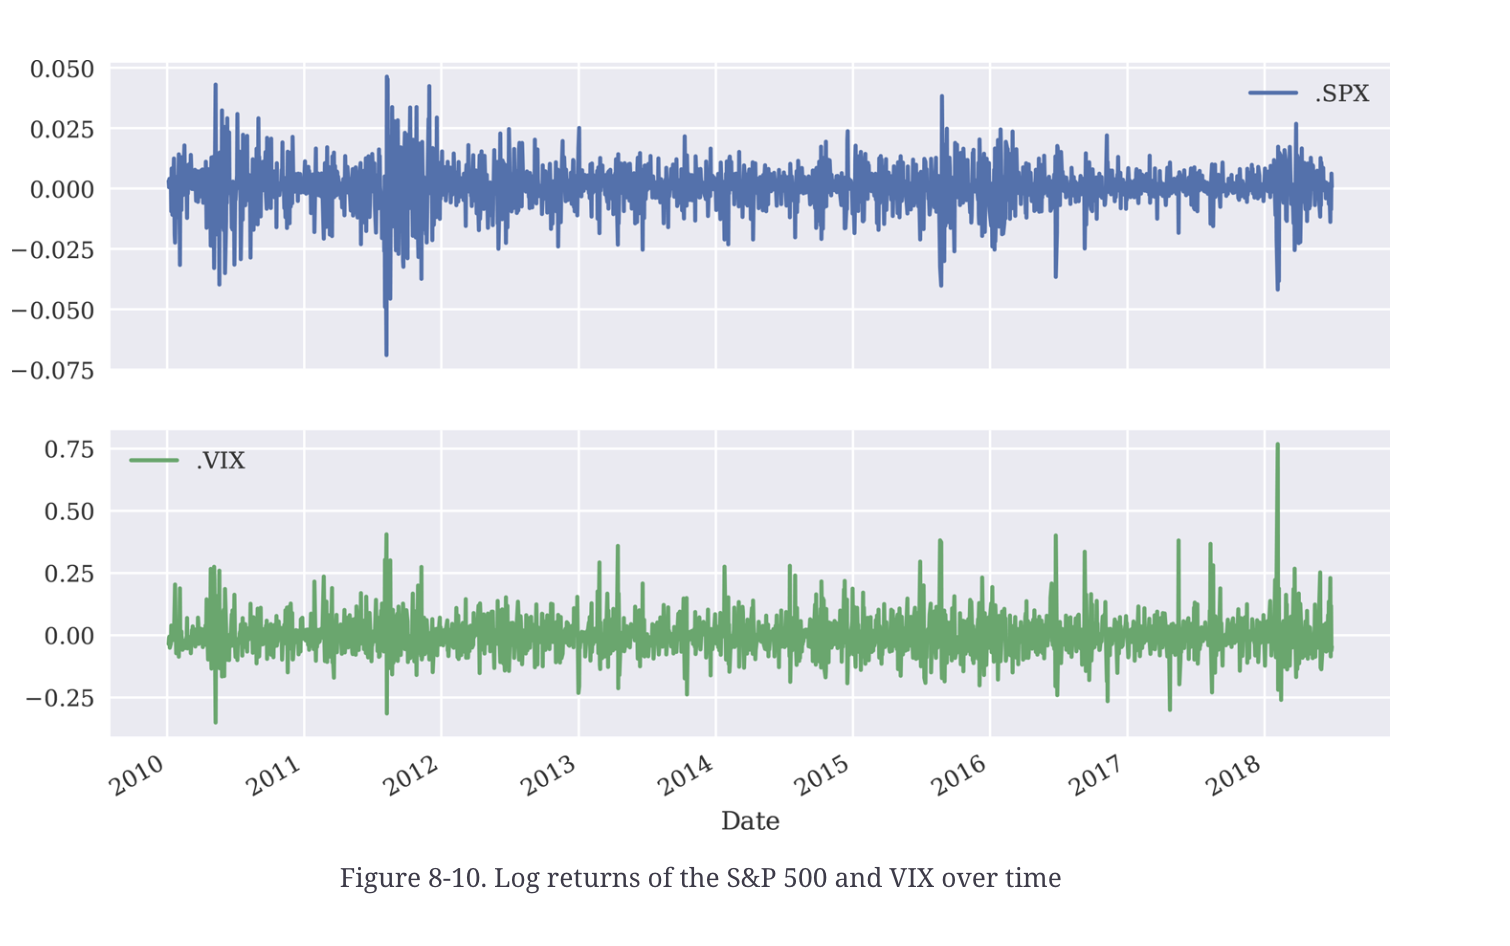

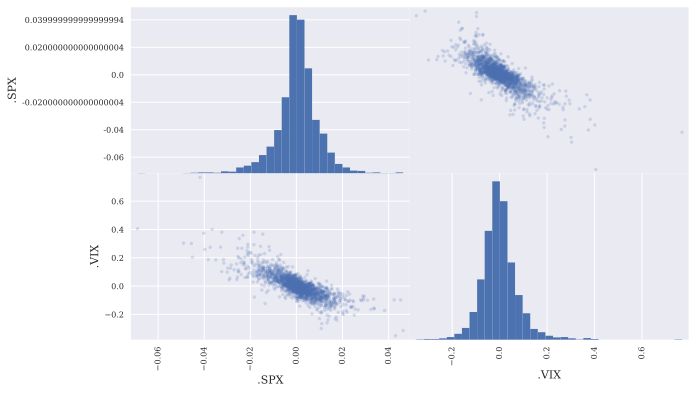

In [54]:
pd.plotting.scatter_matrix(rets,  
                           alpha=0.2,  
                           diagonal='hist',  
                           hist_kwds={'bins': 35},  
                           figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_11.png');

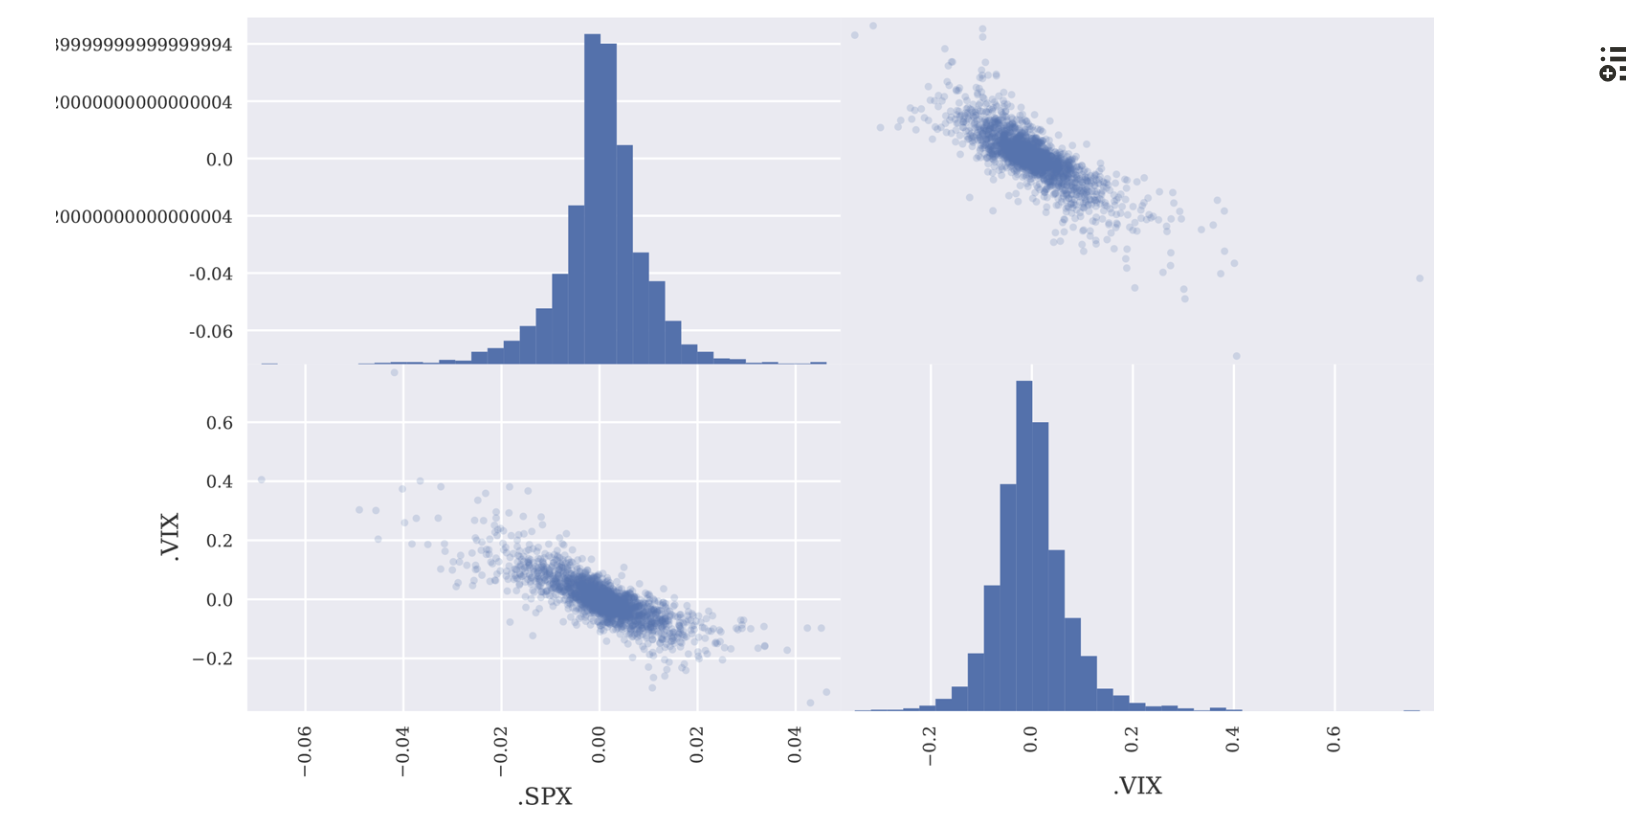

### OLS Regression

In [55]:
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1)  

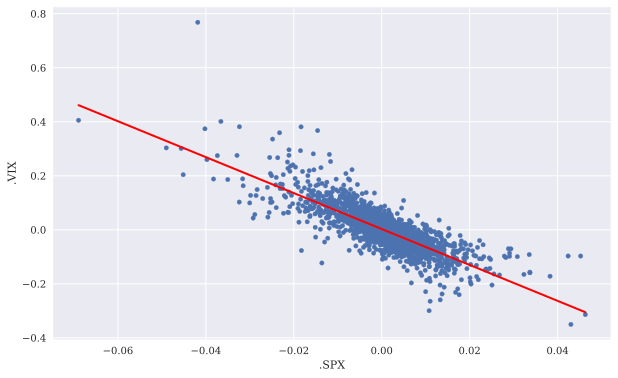

In [56]:
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6))  
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2);  
# plt.savefig('../../images/ch08/fts_12.png');

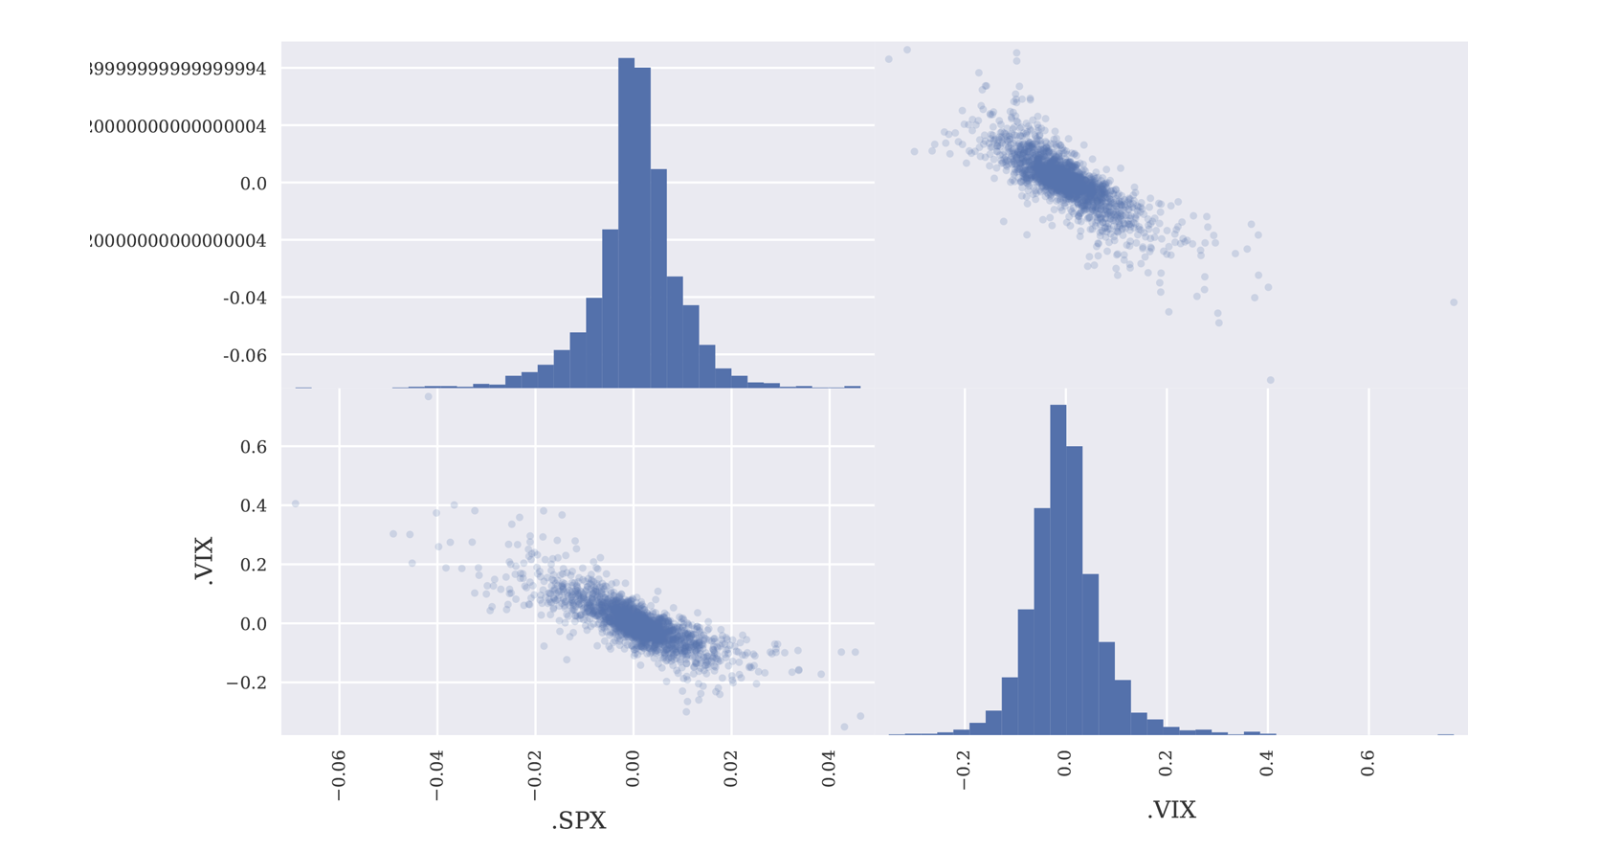

### Correlation

Finally, we consider correlation measures directly. Two such measures are considered: a static one taking into account the complete data set and a rolling one showing the correlation for a fixed window over time.

In [57]:
rets.corr()  

.SPX      .VIX
.SPX  1.000000 -0.804382
.VIX -0.804382  1.000000

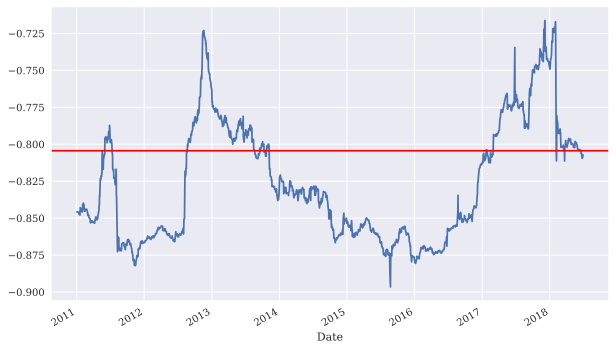

In [58]:
ax = rets['.SPX'].rolling(window=252).corr(
                  rets['.VIX']).plot(figsize=(10, 6))  
ax.axhline(rets.corr().iloc[0, 1], c='r');  
# plt.savefig('../../images/ch08/fts_13.png');

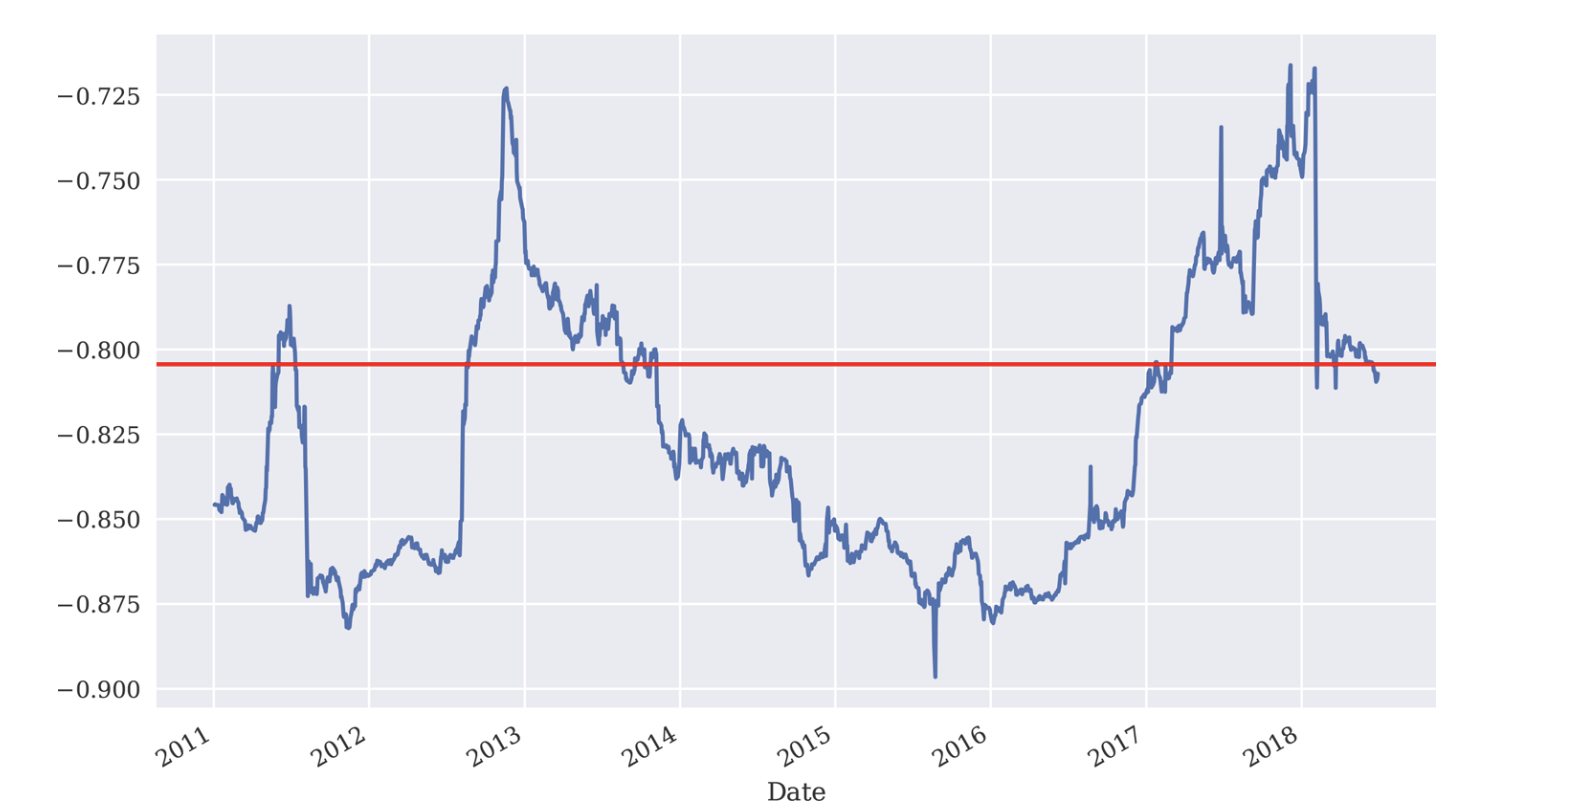

## High Frequency Data

In [59]:
# from fxcmpy import fxcmpy_tick_data_reader as tdr
# data = tdr('EURUSD', start='2018-6-25', end='2018-06-30')
# data.get_data(start='2018-6-29',
#               end='2018-06-30').to_csv('../../source/fxcm_eur_usd_tick_data.csv')

In [60]:
%%time
# data from FXCM Forex Capital Markets Ltd.
tick = pd.read_csv('../../source/fxcm_eur_usd_tick_data.csv',
                     index_col=0, parse_dates=True)

CPU times: user 263 ms, sys: 27.4 ms, total: 290 ms

Wall time: 291 ms


In [61]:
tick.info()

<class 'pandas.core.frame.DataFrame'>

DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000

Data columns (total 2 columns):

 #   Column  Non-Null Count   Dtype  

---  ------  --------------   -----  

 0   Bid     461357 non-null  float64

 1   Ask     461357 non-null  float64

dtypes: float64(2)

memory usage: 10.6 MB


In [62]:
tick['Mid'] = tick.mean(axis=1)  

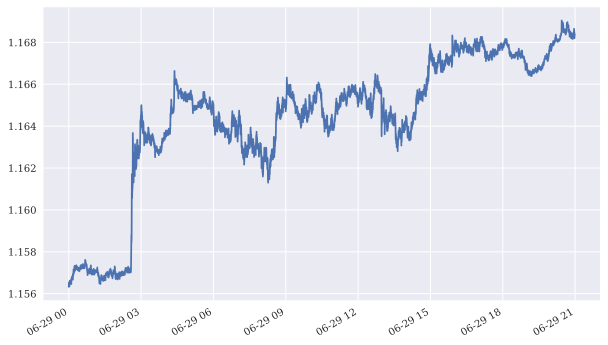

In [63]:
tick['Mid'].plot(figsize=(10, 6));


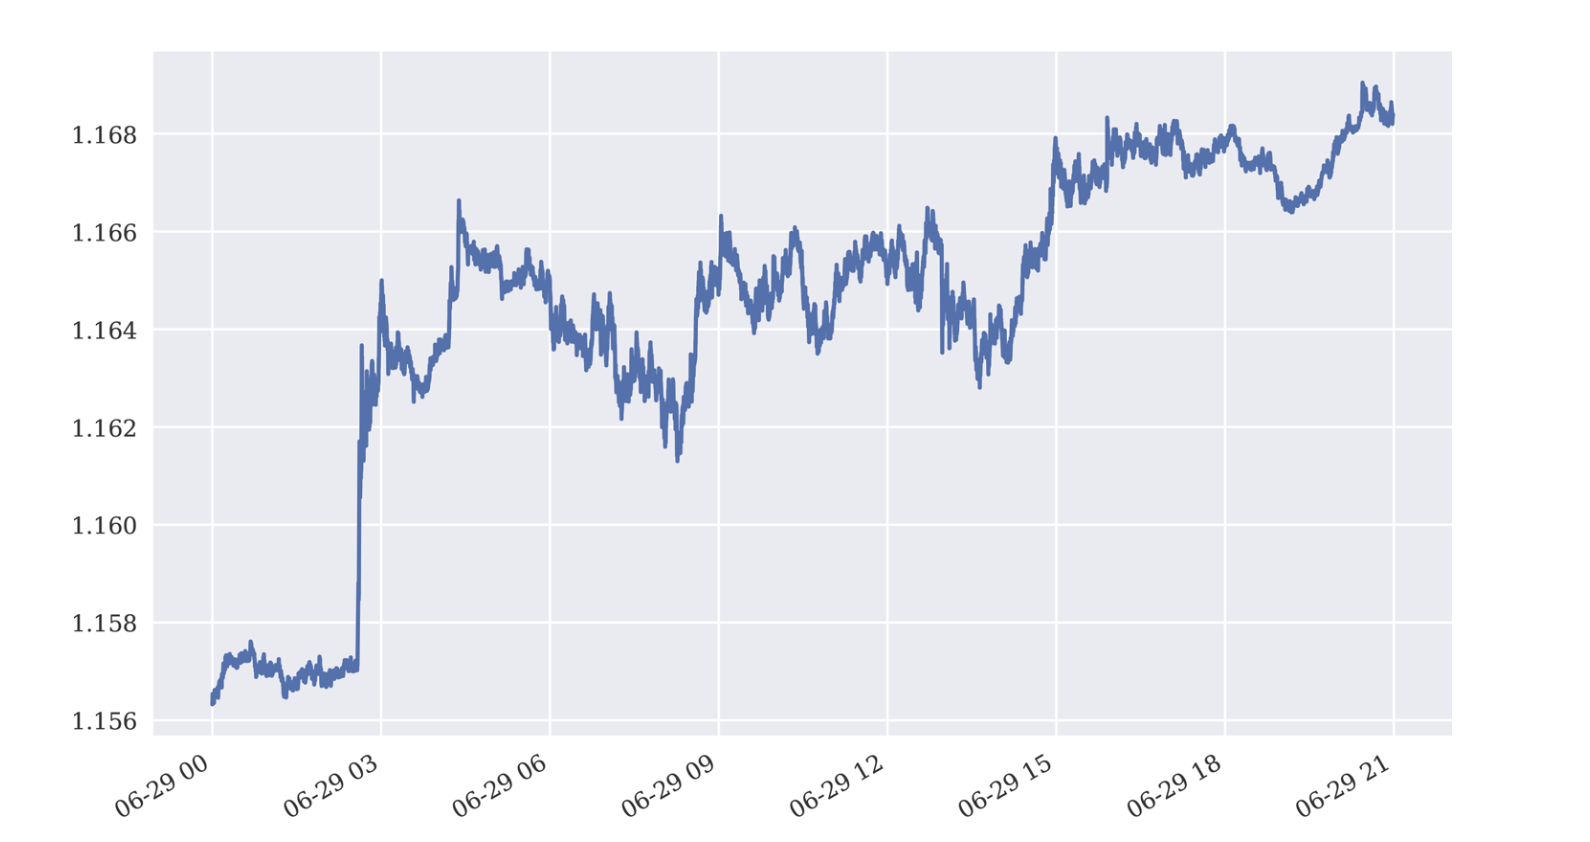

In [64]:
tick_resam = tick.resample(rule='5min', label='right').last()

In [65]:
tick_resam.head()

Bid      Ask       Mid
2018-06-29 00:05:00  1.15649  1.15651  1.156500
2018-06-29 00:10:00  1.15671  1.15672  1.156715
2018-06-29 00:15:00  1.15725  1.15727  1.157260
2018-06-29 00:20:00  1.15720  1.15722  1.157210
2018-06-29 00:25:00  1.15711  1.15712  1.157115

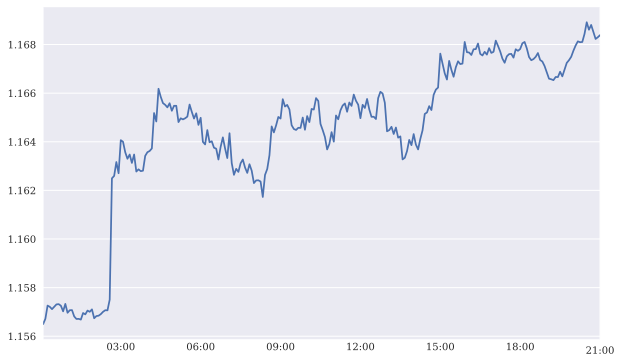

In [66]:
tick_resam['Mid'].plot(figsize=(10, 6));
# plt.savefig('../../images/ch08/fts_15.png');